# SI 370: Contingency tables, crosstabs, mosaic plots and chi-squared

In [19]:
import pandas as pd
import numpy as np

Let's generate a data frame to play with:

In [3]:
df = pd.DataFrame({'color' : ['red', 'green', 'green', 'black'] * 6,
                   'make' : ['ford', 'toyota', 'dodge'] * 8,
                   'vehicleClass' : ['suv', 'suv', 'suv', 'car', 'car', 'truck'] * 4})

In [4]:
df.head()

,color,make,vehicleClass
0,red,ford,suv
1,green,toyota,suv
2,green,dodge,suv
3,black,ford,car
4,red,toyota,car


One of the most basic transformations we can do is a crosstab.  Notice how similar it is to pivoting.

In [7]:
ct = pd.crosstab(df.color,df.vehicleClass)
ct

vehicleClass,car,suv,truck
color,,,
black,2,2,2
green,4,6,2
red,2,4,0


As usual, we would like to visualize our results:

In [8]:
import seaborn as sns

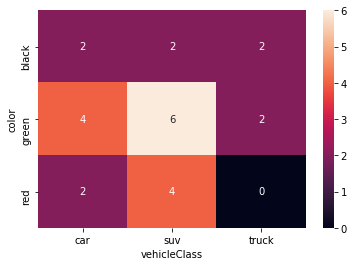

In [9]:
sns.heatmap(ct,annot=True)

### Titanic data

One of the more popular datasets that we use for experimenting with crosstabs is the 
survivor data from the Titanic disaster:

In [10]:
titanic = pd.read_csv('data/titanic.csv')

Let's create a crosstab of the data:

In [11]:
ct = pd.crosstab(titanic.passtype,titanic.status)

Now let's use our knowledge of data manipulation with pandas to generate some marginal totals:

### Q1: Generate this:

![](resources/samplect.png)

### End Q1


### Q2: Is this what we would have expected?

In [23]:
# fill in the correct numbers on the next two lines
expectedAlive = ctExt.total * .000
expectedDead = ctExt.total * .000

### End Q2

Now generate a similar matrix for the *expected* (as oppposed to observed) values:

In [24]:
ctExpected = ct.copy()
ctExpected.alive = expectedAlive
ctExpected.dead = expectedDead
ctExpected['total'] = ctExpected.sum(axis=1)
ctExpected.loc['total'] = ctExpected.sum(axis=0)
alivePercent = np.round(ctExpected.alive/ctExpected.total * 100,decimals=2)
deadPercent = np.round(ctExpected.dead/ctExpected.total * 100,decimals=2)
totalPercent = np.round(ctExpected.total/ctExpected.total * 100,decimals=2)
detailExp = ctExpected.copy()
detailExp.alive = ctExpected.alive.astype('str') + " (" + alivePercent.astype('str') + "%)"
detailExp.dead = ctExpected.dead.astype('str') + " (" + deadPercent.astype('str') + "%)"
detailExp.total = ctExpected.total.astype('str') + " (" + totalPercent.astype('str') + "%)"

In [25]:
detailExp

status,alive,dead,total
passtype,,,
crew,283.2 (32.0%),601.8000000000001 (68.0%),885.0 (100.0%)
first,104.0 (32.0%),221.00000000000003 (68.0%),325.0 (100.0%)
second,91.2 (32.0%),193.8 (68.0%),285.0 (100.0%)
third,225.92000000000002 (32.0%),480.08000000000004 (68.0%),706.0 (100.0%)
total,704.3199999999999 (32.0%),1496.6800000000003 (68.0%),2201.0 (100.0%)


In [26]:
detailCT

status,alive,dead,total
passtype,,,
crew,212 (23.95%),673 (76.05%),885 (100.0%)
first,203 (62.46%),122 (37.54%),325 (100.0%)
second,118 (41.4%),167 (58.6%),285 (100.0%)
third,178 (25.21%),528 (74.79%),706 (100.0%)
total,711 (32.3%),1490 (67.7%),2201 (100.0%)


In addition to the heatmap shown above, we can use a mosaic plot to visualize 
contingency tables:

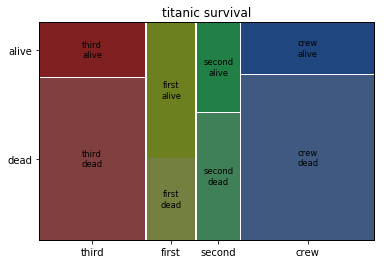

In [31]:
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic, ['passtype','status'],title='titanic survival')

In [ ]:
# slightly easier to read
props = lambda key: {'color': 'r' if 'alive' in key else 'gray'}
t = mosaic(titanic, ['passtype','status'],title='titanic survival',properties=props)

Finally, we can go beyond visual exploration and apply analytic tests to see if the 
observed values differ from the expected ones.  The chi-square test sums the squares of the differences
between the observed and expected values, normalized for the expected values.

In [33]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  190.4011036168333
p-val =  4.999927529867932e-41
degree of freedom =  3
Expected:


,0,1
0,285.885961,599.114039
1,104.986370,220.013630
2,92.064970,192.935030
3,228.062699,477.937301


### Q3: What does this mean?  Is it consistent with your visual interpretation?

For the final part of today's class we're going to use the comic_characters.csv data set:

In [2]:
import pandas as pd

In [3]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


### Q4: Construct a contingency table of sex and character alignment.

Use brief sentences to explain your findings.  



### <font color="magenta">Q5: Create a mosaic plot of character alignment and alive status.

### <font color="magenta">Q6: Conduct a $\chi^2$ test of ```align``` and ```alive```. Print out the matrix of expected values as part of your answer